# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [88]:
import pandas as pd
import numpy as np

sinasc = pd.read_csv('SINASC_RO_2019.csv', sep = ",")
display(sinasc.head(2))
print(sinasc.shape)



,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


(27028, 69)


In [89]:
duplicates = sinasc.duplicated()
duplicates


0        False
1        False
2        False
3        False
4        False
         ...  
27023    False
27024    False
27025    False
27026    False
27027    False
Length: 27028, dtype: bool

In [90]:
sinasc.drop_duplicates().shape # Não há duplicados
sinasc.to_csv("SINASC.csv")

In [91]:
sinasc.isnull().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [92]:
verificar_nulos = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
verificar_nulos.isnull().sum()


LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

In [93]:
sinasc['APGAR5'].isna().sum()

103

In [94]:
sinasc = sinasc.dropna(subset=["APGAR5"])


In [95]:
sinasc.shape

(26925, 69)

In [96]:
# Substituir as informações nulas da coluna ESTCIVMAE pelo valor 9
sinasc["ESTCIVMAE"].replace(to_replace=np.nan, value=9, inplace=True)




In [97]:
verificar_nulos = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
verificar_nulos.isnull().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

In [98]:
sinasc["QTDFILVIVO"].replace(to_replace=np.nan, value=0, inplace=True)
verificar_nulos = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
verificar_nulos.isnull().sum()



LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO       0
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

<AxesSubplot:>

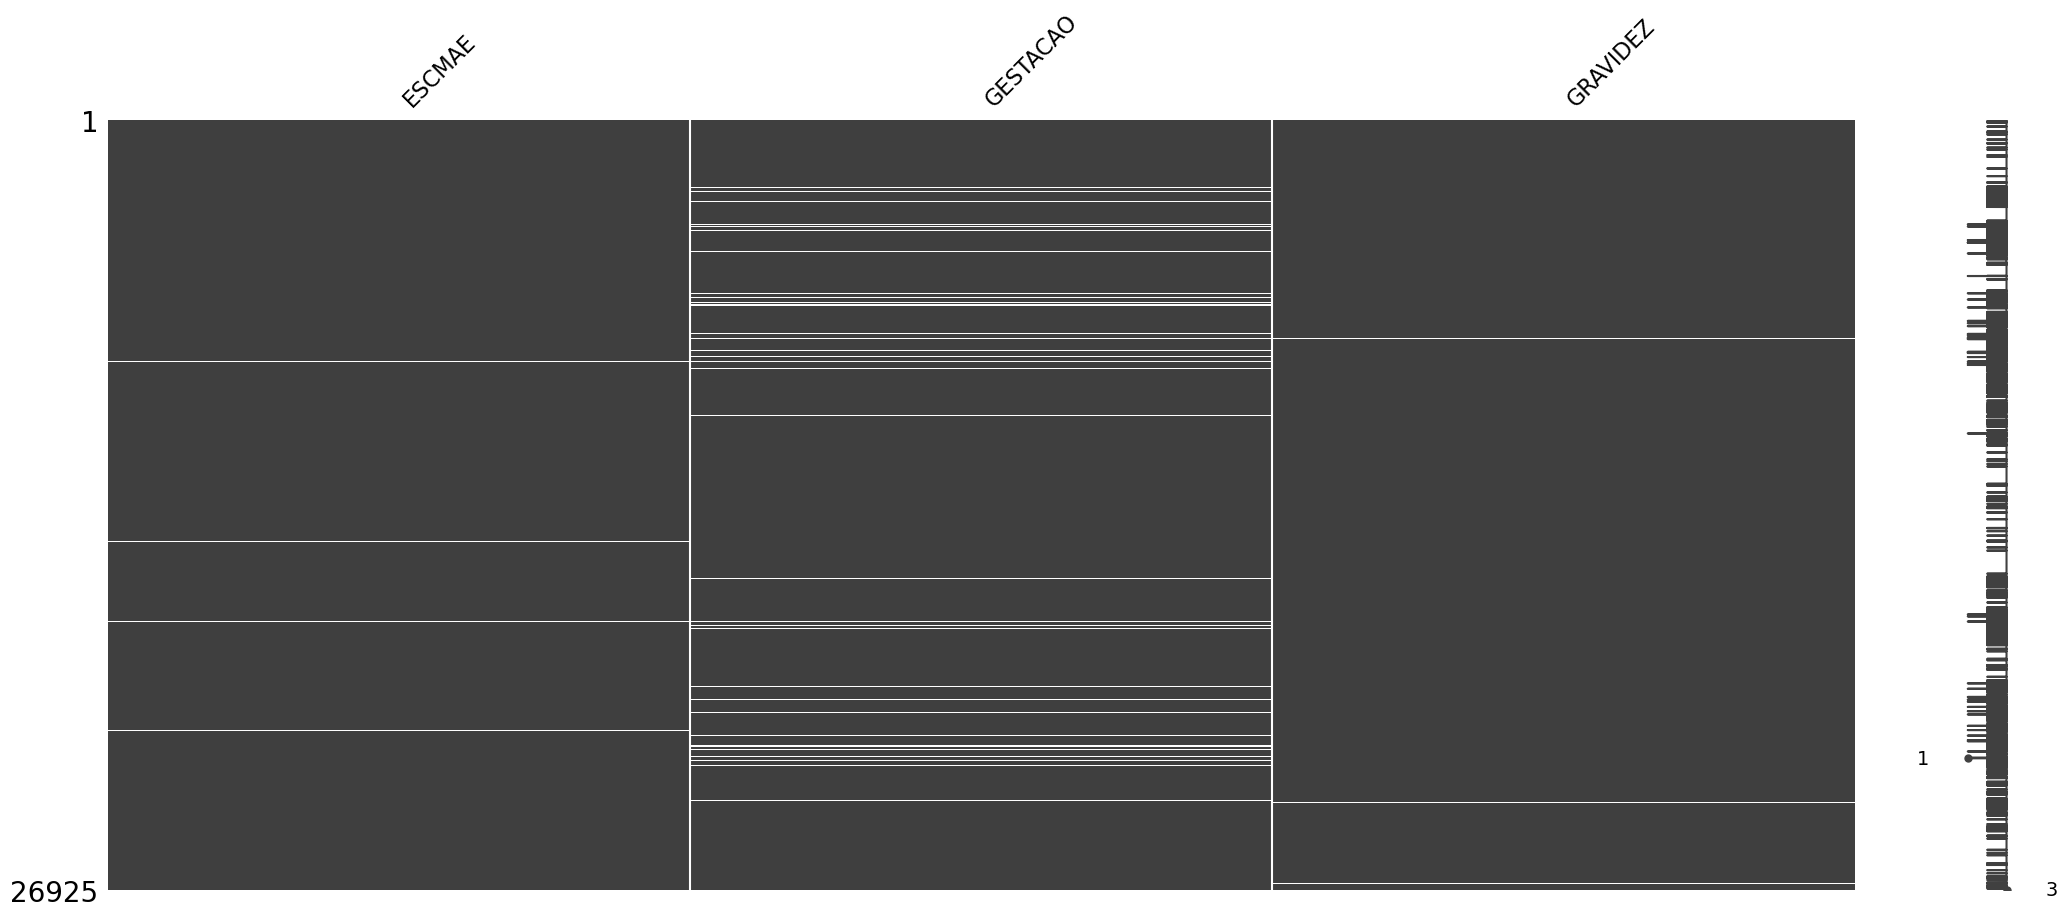

In [99]:
import missingno as msno 
msno.matrix(sinasc[["ESCMAE","GESTACAO","GRAVIDEZ"]])

Para a coluna categorica GESTACAO optei por preencher os dados faltantes pela informação "Desconhecido", já que temos 1216 linhas sem informação nesta coluna, sendo possível ao excluir estas linhas, excluir informações importantes de outras colunas. GRAVIDEZ e ESCMAE serão excluídas as linhas que contiverem informações vazias, pois a quantidade de informações faltantes nestas colunas são pequenas.

In [100]:
sinasc["GESTACAO"].fillna("Desconhecido", inplace = True)


In [101]:
sinasc.dropna(subset = ["GRAVIDEZ"], inplace = True)
sinasc.dropna(subset = ["ESCMAE"], inplace = True)


In [102]:
verificar_nulos = sinasc[['ESCMAE','GESTACAO', 'GRAVIDEZ']]
verificar_nulos.isnull().sum()

ESCMAE      0
GESTACAO    0
GRAVIDEZ    0
dtype: int64

In [103]:
sinasc.to_excel("sinascteste.xlsx")

In [108]:
sinasc = pd.read_csv(r"C:\Users\ncali\OneDrive\Documentos\EBAC\CIÊNCIA DE DADOS\CD - MODULO 6\TEREFA 1\Tarefa1\SINASC.csv")

sinasc.loc[(sinasc["APGAR5"] >= 8) & (sinasc["APGAR5"] <= 10), "Asfixia"] = "Normal"
sinasc.loc[(sinasc["APGAR5"] >= 6) & (sinasc["APGAR5"] <= 7), "Asfixia"] = "Asfixia Leve"
sinasc.loc[(sinasc["APGAR5"] >= 4) & (sinasc["APGAR5"] <= 5), "Asfixia"] = "Asfixia Moderada"
sinasc.loc[(sinasc["APGAR5"] >= 0) & (sinasc["APGAR5"] <= 3), "Asfixia"] = "Asfixia Severa"

sinasc

,Unnamed: 0,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Asfixia
0,0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
1,1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
2,2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
3,3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Normal
4,4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27024,27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,Normal
27025,27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27026,27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal


In [109]:
sinasc["Asfixia"].value_counts()

Asfixia
Normal              26463
Asfixia Leve          320
nan                   103
Asfixia Severa         74
Asfixia Moderada       68
Name: count, dtype: int64